<a href="https://colab.research.google.com/github/monahafez-tmu/-EE8230-701E_Machine-Learning-for-Engineers-Project-7/blob/main/Term_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Alcohol Content in Red Wine: A Regression Problem

## 1. Introduction

This document outlines a regression problem based on the Wine Quality dataset, specifically focusing on the red wine data. The objective is to predict the alcohol content of red wine using its other physicochemical properties. This is a classic regression task where the target variable, alcohol, is a continuous value.

The analysis of this dataset can provide valuable insights into the chemical characteristics that influence the alcohol level in red wine. The following sections detail the problem statement, the dataset, the exploratory data analysis, and a proposed approach for building a predictive model.


## 2. Dataset

The dataset is taken from Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

In [2]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

Red Wine Data was used from the available dataset.

In [3]:
red_wine_mask = (wine_quality.data.original['color'] == 'red')

X = X[red_wine_mask]
y = y[red_wine_mask]

print(f"Shape of features for red wine (X): {X.shape}")
print(f"Shape of target for red wine (y): {y.shape}")

Shape of features for red wine (X): (1599, 11)
Shape of target for red wine (y): (1599, 1)


# 2. Problem Statement

The primary goal is to develop a regression model that accurately predicts the alcohol percentage in red wine based on the following 11 physicochemical features:

* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Quality (score between 3 and 8)

This model could be used by winemakers to understand and potentially control the factors that determine alcohol content, a key component of a wine's character and quality.

## 3. Dataset Overview

The dataset consists of 1,599 samples of red wine, with no missing values. All features are numerical, making it suitable for direct use in most regression algorithms.

## 4. Proposed Regression Approach

A systematic approach to building and evaluating the regression model is proposed below:

1. Data Preprocessing:

* The dataset was split into training (i.e., 80%) and testing (i.e., 20%) sets.

* The features were standardized using StandardScaler to ensure that all features have a mean of 0 and a standard deviation of 1. This is crucial for models that are sensitive to the scale of input features, such as Ridge and Lasso regression.

2. Model Selection and Training:

* Baseline Model: it started with a simple Linear Regression model to establish a baseline performance.

* Regularized Linear Models: Ridge, Lasso, and ElasticNet regression were implemented to handle potential multicollinearity and perform feature selection.

* Non-linear Models: More complex, non-linear models were explored such as Random Forest Regressor and Gradient Boosting Regressor, which are often capable of capturing more intricate patterns in the data.

3. Model Evaluation:

The performance of each model was evaluated on the testing set using the following metrics:

* Mean Absolute Error (MAE): Provides a straightforward interpretation of the average prediction error.

* Mean Squared Error (MSE): Penalizes larger errors more heavily.

* R-squared (R²): Represents the proportion of the variance in the target variable that is predictable from the features.






In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Splitting the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Training and Evaluation ---
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    # Train the model
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# Print results (or save to a file for later use)
print("\nModel Performance Summary:")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model Performance Summary:
--- Linear Regression ---
  MAE: 0.5035
  MSE: 0.3900
  R2: 0.4032
--- Ridge Regression ---
  MAE: 0.5036
  MSE: 0.3900
  R2: 0.4032
--- Lasso Regression ---
  MAE: 0.6853
  MSE: 0.6572
  R2: -0.0056
--- Random Forest Regressor ---
  MAE: 0.4224
  MSE: 0.3012
  R2: 0.5390


4. Feature Importance Analysis:

* The feature importances or coefficients of the final model were analyzed to identify the most influential physicochemical properties in determining the alcohol content of red wine. This will provide actionable insights for winemakers.



In [7]:
# Feature Importance for Random Forest
if "Random Forest Regressor" in models:
    rf_model = models["Random Forest Regressor"]
    importances = rf_model.feature_importances_
    feature_names = X.columns
    sorted_indices = np.argsort(importances)[::-1]

    print("\nRandom Forest Feature Importance:")
    for i in sorted_indices:
        print(f"  {feature_names[i]}: {importances[i]:.4f}")


Random Forest Feature Importance:
  alcohol: 0.2709
  sulphates: 0.1484
  volatile_acidity: 0.1115
  total_sulfur_dioxide: 0.0768
  chlorides: 0.0711
  pH: 0.0614
  residual_sugar: 0.0579
  fixed_acidity: 0.0532
  density: 0.0508
  citric_acid: 0.0508
  free_sulfur_dioxide: 0.0472


## 5. Exploratory Data Analysis (EDA)

An initial EDA was performed to understand the relationships between the features and the target variable, alcohol. The key findings are summarized below, with a comprehensive visualization attached.



/tmp/ipython-input-287870535.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=red_wine_df, x='quality', y='alcohol', palette='Reds', ax=ax4)


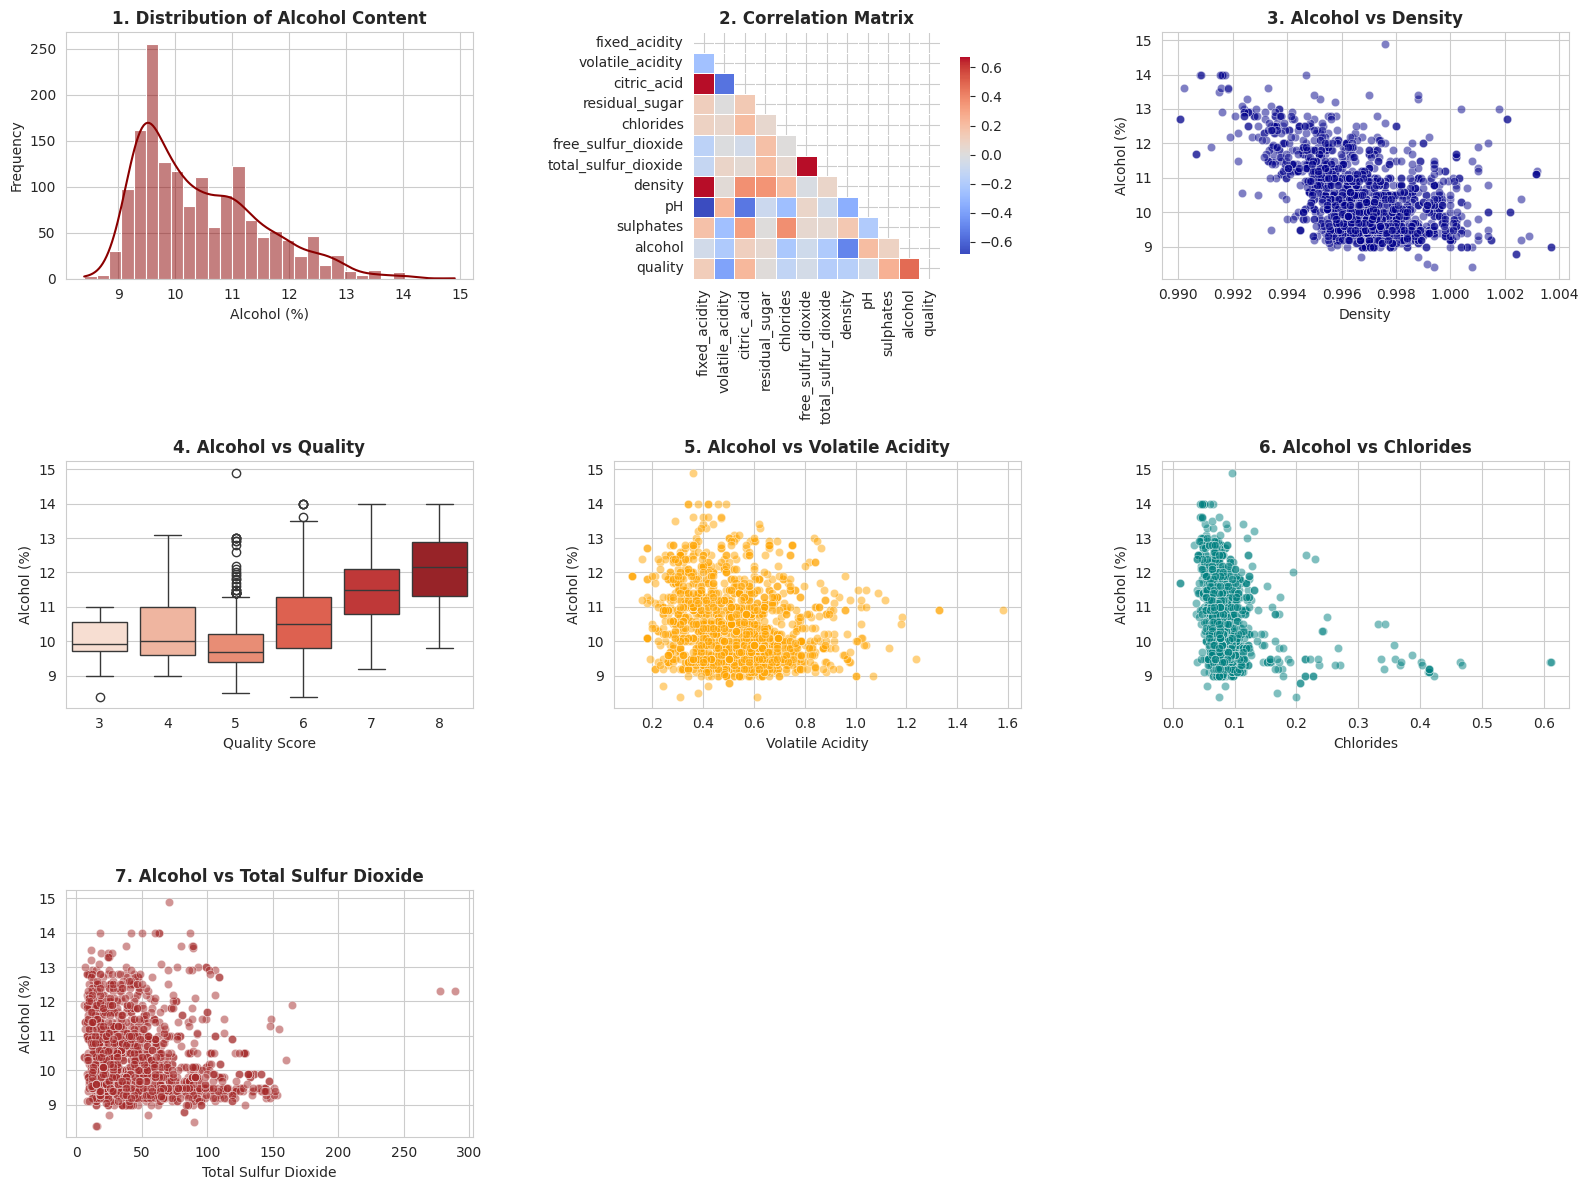

In [8]:


# Create a combined DataFrame for red wine data for plotting
red_wine_df = pd.concat([X, y], axis=1)

# --- Create Visualizations ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

fig = plt.figure(figsize=(16, 12))

# Distribution of Alcohol (Feature Variable)
ax1 = plt.subplot(3, 3, 1)
sns.histplot(red_wine_df['alcohol'], bins=30, kde=True, color='darkred', ax=ax1)
ax1.set_title('1. Distribution of Alcohol Content', fontsize=12, fontweight='bold')
ax1.set_xlabel('Alcohol (%)')
ax1.set_ylabel('Frequency')

# Correlation Matrix
ax2 = plt.subplot(3, 3, 2)
corr_matrix = red_wine_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax2)
ax2.set_title('2. Correlation Matrix', fontsize=12, fontweight='bold')

# Alcohol vs Density
ax3 = plt.subplot(3, 3, 3)
sns.scatterplot(data=red_wine_df, x='density', y='alcohol', alpha=0.5, color='darkblue', ax=ax3)
ax3.set_title('3. Alcohol vs Density', fontsize=12, fontweight='bold')
ax3.set_xlabel('Density')
ax3.set_ylabel('Alcohol (%)')

# Alcohol vs Quality
ax4 = plt.subplot(3, 3, 4)
sns.boxplot(data=red_wine_df, x='quality', y='alcohol', palette='Reds', ax=ax4)
ax4.set_title('4. Alcohol vs Quality', fontsize=12, fontweight='bold')
ax4.set_xlabel('Quality Score')
ax4.set_ylabel('Alcohol (%)')

# Alcohol vs Volatile Acidity
ax5 = plt.subplot(3, 3, 5)
sns.scatterplot(data=red_wine_df, x='volatile_acidity', y='alcohol', alpha=0.5, color='orange', ax=ax5)
ax5.set_title('5. Alcohol vs Volatile Acidity', fontsize=12, fontweight='bold')
ax5.set_xlabel('Volatile Acidity')
ax5.set_ylabel('Alcohol (%)')

# Alcohol vs Chlorides
ax6 = plt.subplot(3, 3, 6)
sns.scatterplot(data=red_wine_df, x='chlorides', y='alcohol', alpha=0.5, color='teal', ax=ax6)
ax6.set_title('6. Alcohol vs Chlorides', fontsize=12, fontweight='bold')
ax6.set_xlabel('Chlorides')
ax6.set_ylabel('Alcohol (%)')

# Alcohol vs Total Sulfur Dioxide
ax7 = plt.subplot(3, 3, 7)
sns.scatterplot(data=red_wine_df, x='total_sulfur_dioxide', y='alcohol', alpha=0.5, color='brown', ax=ax7)
ax7.set_title('7. Alcohol vs Total Sulfur Dioxide', fontsize=12, fontweight='bold')
ax7.set_xlabel('Total Sulfur Dioxide')
ax7.set_ylabel('Alcohol (%)')

plt.tight_layout()
output_filename = 'eda_visualizations.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
#########print(f"Visualizations saved to {output_filename}")

## Key Findings:

* Distribution of Alcohol: The alcohol content is slightly right-skewed, with most wines having an alcohol percentage between 9.5% and 11.1%.

* Correlations with Alcohol: The analysis revealed several significant correlations:

* Strongest Positive Correlation: quality (0.48). This indicates that higher-quality wines tend to have higher alcohol content.

* Strongest Negative Correlation: density (-0.50). As the density of the wine decreases, the alcohol content tends to increase. This is expected, as alcohol is less dense than water.

* Other Notable Correlations:

* pH (0.21): Positive correlation.

* chlorides (-0.22): Negative correlation.

* total sulfur dioxide (-0.21): Negative correlation.

* volatile acidity (-0.20): Negative correlation.





These correlations suggest that a linear regression model could be a good starting point, but the non-linear relationships observed in the scatter plots indicate that more complex models might provide better performance.



## 6. Conclusion

This regression problem provides a well-defined challenge with a clean and accessible dataset. By following the proposed approach, it is possible to develop a robust regression model that can accurately predict the alcohol content of red wine and uncover the key chemical drivers behind it. The insights gained from this analysis can be both academically interesting and commercially valuable.

